In [104]:
from PaperTennis_env import PaperTennisEnv
import numpy as np
import matplotlib.pyplot as plt
import time
import pickle
import os.path
from os import path
import scipy.io

In [130]:
#Hyperparms
GAMMA = 1
ALPHA = 0.1
E_GREEDY = 0.1

Startegies = {
    "Mean": 1,
    "Long": 2,
    "Short": 3,
    "Rand": 4,
}

In [140]:
# Run Parms !!!!!
OPP_Strat='Long'
NUM_EPISODES = 100000

# Get Opponent Startegy index
OPPONENT = Startegies[OPP_Strat]



In [113]:
# Function approx to compute
def Q_value(state,action,linear_weights):

    s_diff = state[1] - state [2]
    w = np.array([state[0],state[1],state[2],s_diff,action])
#     w = np.array([state[1],state[2],s_diff,action])

    return (linear_weights @ w).item()

def get_features(state,action):

    s_diff = state[1] - state [2]
    w = np.array([state[0],state[1],state[2],s_diff,action])
#     w = np.array([state[1],state[2],s_diff,action])
    return w

In [114]:
# Get action e-greedy
def get_action(linear_weights, state):
    p_epsilon = np.random.uniform(0,1)
    if p_epsilon < E_GREEDY:
        return np.argmax(np.random.uniform(0,1,(1,50)))

    q_s = np.zeros(50)

    for i in range(0,50):
        q_s[i] = Q_value(state,i,linear_weights)

    return np.argmax(q_s)

In [141]:
start_time = time.time()

linear_weights = np.random.rand(1,5)
# linear_weights = np.random.rand(1,4)

# init env
env = PaperTennisEnv()

# Plotting Stuff
trend_wins = np.zeros(NUM_EPISODES-100)
trend_TD = np.zeros(NUM_EPISODES-100)
cum_reward = np.zeros(NUM_EPISODES+1)

wins = np.zeros(NUM_EPISODES)
td_error = np.zeros(NUM_EPISODES)

for episode in range(NUM_EPISODES):

    env.reset()
    state = env.state
    done = False

    action = get_action(linear_weights, state)

    # Generate an episode
    error_episode = 0
    while not done:

        state_prime, reward, done = env.step(action,OPPONENT)

        action_prime = get_action(linear_weights, state)

        # Linear SARSA update (Section 10.1, psuedocode) 
        td_update = (reward + GAMMA * Q_value(state_prime,action_prime,linear_weights)-Q_value(state,action,linear_weights)) * get_features(state,action)      
        linear_weights = linear_weights + ALPHA*(td_update/max(1,np.linalg.norm(td_update)))
        error_episode += np.sum(td_update)

        state  = state_prime
        action = action_prime

        if (done and reward == 1):
            wins[episode] = 1        

    td_error[episode] = error_episode
    if episode >= 100:
        trend_wins[episode-100] = np.sum(wins[episode-100:episode])
        trend_TD[episode-100] = np.sum(td_error[episode-100:episode])
    
    if episode%10000 == 0: print("Episode %d completed with reward %d" % (episode, reward))
        
# Save Q-val Table and episode count
# pickle.dump([train_episodes,Q_val], open(OPP_Strat + '.p', "wb" ) )

# Print run details
print("--- %s seconds ---" % (time.time() - start_time))
print("Final mean win percent = %s " % (np.mean(trend_wins[-100:]))) 
# print("Total Episodes %s " % (train_episodes))

Episode 0 completed with reward 1
Episode 10000 completed with reward 1
Episode 20000 completed with reward -1
Episode 30000 completed with reward 1
Episode 40000 completed with reward 1
Episode 50000 completed with reward -1
Episode 60000 completed with reward 1
Episode 70000 completed with reward -1
Episode 80000 completed with reward 1
Episode 90000 completed with reward 1
--- 121.83200311660767 seconds ---
Final mean win percent = 100.0 


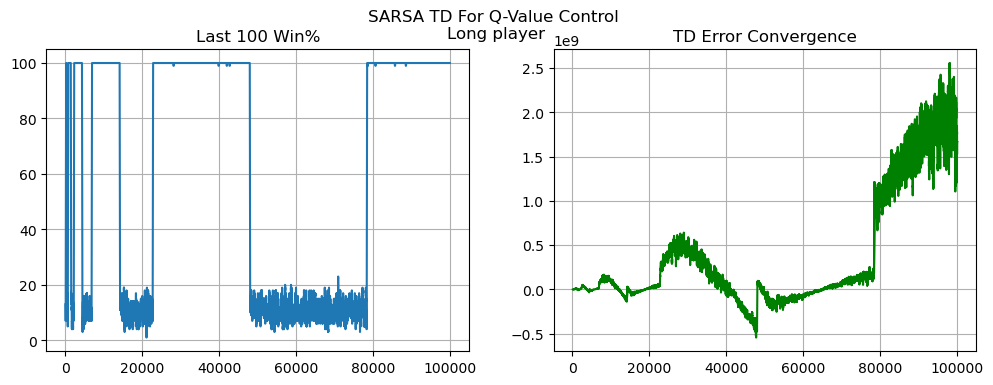

In [142]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(12,4), dpi= 100, facecolor='w', edgecolor='k')
ax1.plot(range(100,NUM_EPISODES),trend_wins)
ax2.plot(range(100,NUM_EPISODES),trend_TD,c='g')
ax1.title.set_text("Last 100 Win%")
ax2.title.set_text("TD Error Convergence")
fig.suptitle('SARSA TD For Q-Value Control \n' +  OPP_Strat + ' player')
# ax1.set_xscale('log')
# ax2.set_xscale('log')
ax1.grid()
ax2.grid()

In [139]:
linear_weights

array([[ 1.16351865, 85.477069  , 80.7285037 ,  5.70917472, 97.97138532]])